In [9]:
!rm /App/output/aggregated_50.csv
!rm -rf /App/output/train_50
!mkdir /App/output/train_50

rm: cannot remove '/App/output/aggregated_50.csv': No such file or directory


## Initial test

### RTT scheduler

In [10]:
%%bash

mn -c

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
( ip link del s1-eth3 ) 2> /dev/null
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup co

In [11]:
%%bash

cd /App/mininettest/ && python /App/mininettest/legacyschtest.py --scheduler rtt --rtt 50 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

4737.17
Serving new connection: 7a79497c8478f1cb, version 512 from 10.0.0.1:58377
GET 10.0.0.20:6121/test3
Responding with 200
Info for stream 5 of 7a79497c8478f1cb
Path 0: sent 7 retrans 1 lost 0; rcv 6 rtt 899.529ms
Congestion Window: 46720
Path 3: sent 1037 retrans 0 lost 0; rcv 523 rtt 156.046ms
Congestion Window: 96360
Path 1: sent 608 retrans 0 lost 0; rcv 229 rtt 749.602ms
Congestion Window: 229220


*** Error setting resource limits. Mininet's performance may be affected.


### Trained DQNAgent

In [12]:
%%bash

cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_24050_steps.h5f --rtt 50 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $(bc <<< "scale=2; 2*1024*1024*8/$time") 
cat /App/logs/server.logs

4604.67
Serving new connection: 798a4da2e64470ca, version 512 from 10.0.0.1:40210
GET 10.0.0.20:6121/test3
Responding with 200
Info for stream 5 of 798a4da2e64470ca
Path 0: sent 321 retrans 1 lost 0; rcv 130 rtt 551.155ms
Congestion Window: 86140
Path 3: sent 499 retrans 0 lost 0; rcv 236 rtt 286.599ms
Congestion Window: 77380
Path 1: sent 844 retrans 7 lost 0; rcv 339 rtt 551.155ms
Congestion Window: 283240


*** Error setting resource limits. Mininet's performance may be affected.


## Comparison

In [13]:
%%bash
rm /App/logs/client.logs
echo 24050 > /App/output/train_50/validate_24050.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_24050_steps.h5f --rtt 50 --valid_congestion 0 --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_50/validate_24050.csv
done

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
( ip link del s1-eth3 ) 2> /dev/null
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup co

In [14]:
%%bash
rm /App/logs/client.logs
echo 0 > /App/output/train_50/validate_rtt.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python /App/mininettest/legacyschtest.py --scheduler rtt --rtt 50  --background-tcp
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_50/validate_rtt.csv
done

*** Removing excess controllers/ofprotocols/ofdatapaths/pings/noxes
killall controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
killall -9 controller ofprotocol ofdatapath ping nox_core lt-nox_core ovs-openflowd ovs-controller udpbwtest mnexec ivs 2> /dev/null
pkill -9 -f "sudo mnexec"
*** Removing junk from /tmp
rm -f /tmp/vconn* /tmp/vlogs* /tmp/*.out /tmp/*.log
*** Removing old X11 tunnels
*** Removing excess kernel datapaths
ps ax | egrep -o 'dp[0-9]+' | sed 's/dp/nl:/'
***  Removing OVS datapaths
ovs-vsctl --timeout=1 list-br
ovs-vsctl --if-exists del-br s1
ovs-vsctl --timeout=1 list-br
*** Removing all links of the pattern foo-ethX
ip link show | egrep -o '([-_.[:alnum:]]+-eth[[:digit:]]+)'
( ip link del s1-eth3 ) 2> /dev/null
ip link show
*** Killing stale mininet node processes
pkill -9 -f mininet:
*** Shutting down stale tunnels
pkill -9 -f Tunnel=Ethernet
pkill -9 -f .ssh/mn
rm -f ~/.ssh/mn/*
*** Cleanup co

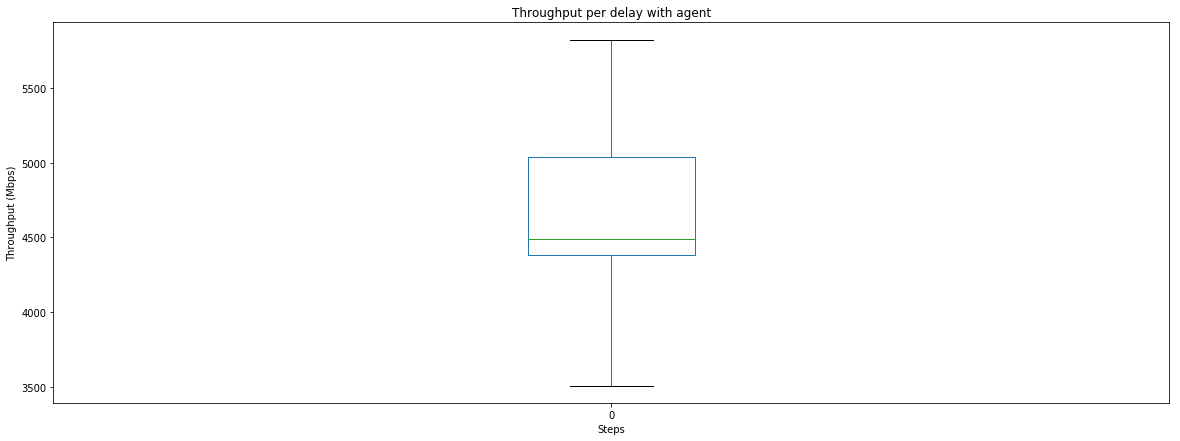

In [15]:
import pandas


rtt_sch = pandas.read_csv("/App/output/train_50/validate_rtt.csv")

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)


(2*8 * 1024 * 1024 / rtt_sch).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

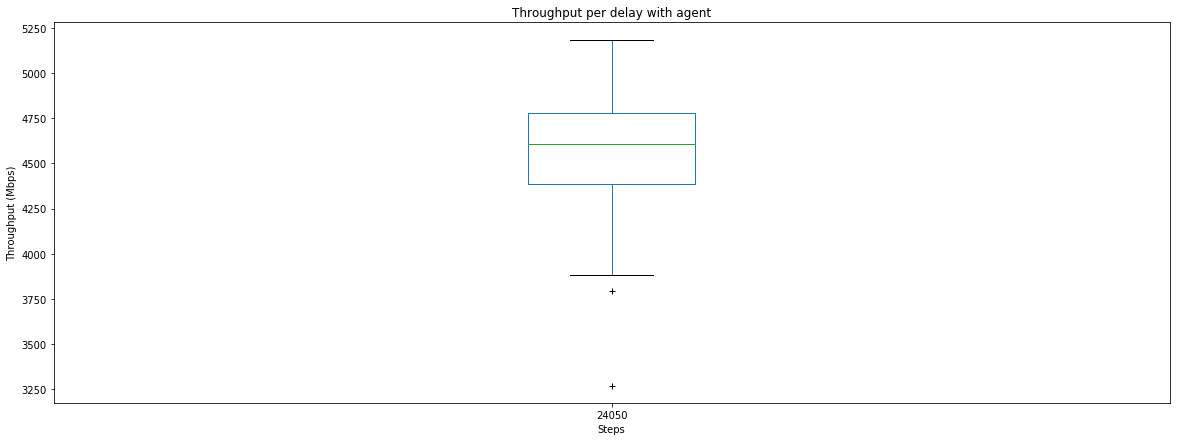

In [16]:
rtt_24050= pandas.read_csv("/App/output/train_50/validate_24050.csv")
%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(20, 7)
(2*8 * 1024 * 1024 / rtt_24050).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")

In [17]:
(2*8 * 1024 * 1024 / rtt_24050).median()

24050    4608.491779
dtype: float64

In [18]:
(2*8 * 1024 * 1024 / rtt_24050).mean()

24050    4583.970019
dtype: float64

In [19]:
(2*8 * 1024 * 1024 / rtt_sch).median()

0    4488.018039
dtype: float64

In [20]:
(2*8 * 1024 * 1024 / rtt_sch).mean()

0    4675.773543
dtype: float64